In [17]:
import joblib
import os
import pathlib

from wifisidechannels.units.txbf import TxBf

PHY_DOMAIN      = 6
CWD = os.getcwd()
DSD = pathlib.Path(os.path.join(CWD, "EXPERIMENT_STATIC", f"ROOM_{PHY_DOMAIN}_STATIC"))
DSD = "/mnt/fast_work/wifisidechannels/EXPERMIENT_STATIC/ROOM_6_STATIC"
UNIT = TxBf()
files       = sorted([ pathlib.Path(os.path.join(folder, x)) for folder,_,y in os.walk(DSD) for x in y if ".dump" in x and "meta" not in str(x).lower()])

sample0     = (files[0], joblib.load(files[0]))
sample1     = (files[1], joblib.load(files[1]))


In [18]:
import numpy as np
print(sample0)
print(sample1)
sample0np = (sample0[0], np.squeeze(np.array([p.DATA["V"] for p in sample0[1]]))[:,:,0, 0])
sample1np = (sample1[0], np.squeeze(np.array([p.DATA["V"] for p in sample1[1]]))[:,:,0, 0])
print(sample0np, sample0np[1].shape)
print(sample1np, sample1np[1].shape)

(PosixPath('/mnt/fast_work/wifisidechannels/EXPERMIENT_STATIC/ROOM_6_STATIC/0/24_09_20-00_56_32_EMSEC_0123456789_data.dump'), [<wifisidechannels.models.models.Packet object at 0x7c2d8d406920>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7bbaf0>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7baa10>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7b8610>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7bae60>, <wifisidechannels.models.models.Packet object at 0x7c2d8d72c940>, <wifisidechannels.models.models.Packet object at 0x7c2d8d72f4f0>, <wifisidechannels.models.models.Packet object at 0x7c2d8d72e860>, <wifisidechannels.models.models.Packet object at 0x7c2d8d72cf10>, <wifisidechannels.models.models.Packet object at 0x7c2d8d72f400>, <wifisidechannels.models.models.Packet object at 0x7c2d8d72f4c0>, <wifisidechannels.models.models.Packet object at 0x7c2d8d72f640>, <wifisidechannels.models.models.Packet object at 0x7c2d8d72e1a0>, <wifisidechanne

In [19]:
import joblib
import os
import pathlib

from wifisidechannels.units.txbf import TxBf

PHY_DOMAIN      = 6
CWD = os.getcwd()
DSD = pathlib.Path(os.path.join(CWD, "EXPERIMENT_STATIC", f"ROOM_{PHY_DOMAIN}_STATIC"))
DSD = "/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6"
UNIT = TxBf()
files       = sorted([ pathlib.Path(os.path.join(folder, x)) for folder,_,y in os.walk(DSD) for x in y if ".dump" in x and "meta" not in str(x).lower()])

nsample0     = (files[0], joblib.load(files[0]))
nsample1     = (files[1], joblib.load(files[1]))


In [20]:
import numpy as np
print(nsample0)
print(nsample1)
nsample0np = (nsample0[0], np.squeeze(np.array([p.DATA["V"] for p in nsample0[1]]))[:,:,0, 0])
nsample1np = (nsample1[0], np.squeeze(np.array([p.DATA["V"] for p in nsample1[1]]))[:,:,0, 0])
print(nsample0np, nsample0np[1].shape)
print(nsample1np, nsample1np[1].shape)

(PosixPath('/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6/0/24_09_23-19_21_12_EMSEC_0123456789_data.dump'), [<wifisidechannels.models.models.Packet object at 0x7c2d8d405e70>, <wifisidechannels.models.models.Packet object at 0x7c2d8d75b520>, <wifisidechannels.models.models.Packet object at 0x7c2d8d75b400>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7586a0>, <wifisidechannels.models.models.Packet object at 0x7c2d8d759030>, <wifisidechannels.models.models.Packet object at 0x7c2d8d759540>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7b9450>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7b9570>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7bb6d0>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7b9ab0>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7b9600>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7bb640>, <wifisidechannels.models.models.Packet object at 0x7c2d8d7bbf70>, <wifisidechannels.models.mode

In [21]:
dist = np.array([ np.linalg.norm(np.abs(x) - np.abs(y)) for x,y in zip(sample0np[1], nsample1np[1]) ][:])

In [22]:
print(dist.shape)
print(dist[-10:])

(14372,)
[5.67968894 5.68169293 5.58275166 5.80692399 5.82247327 5.58680817
 5.55407412 5.6006556  5.66638232 5.66675201]


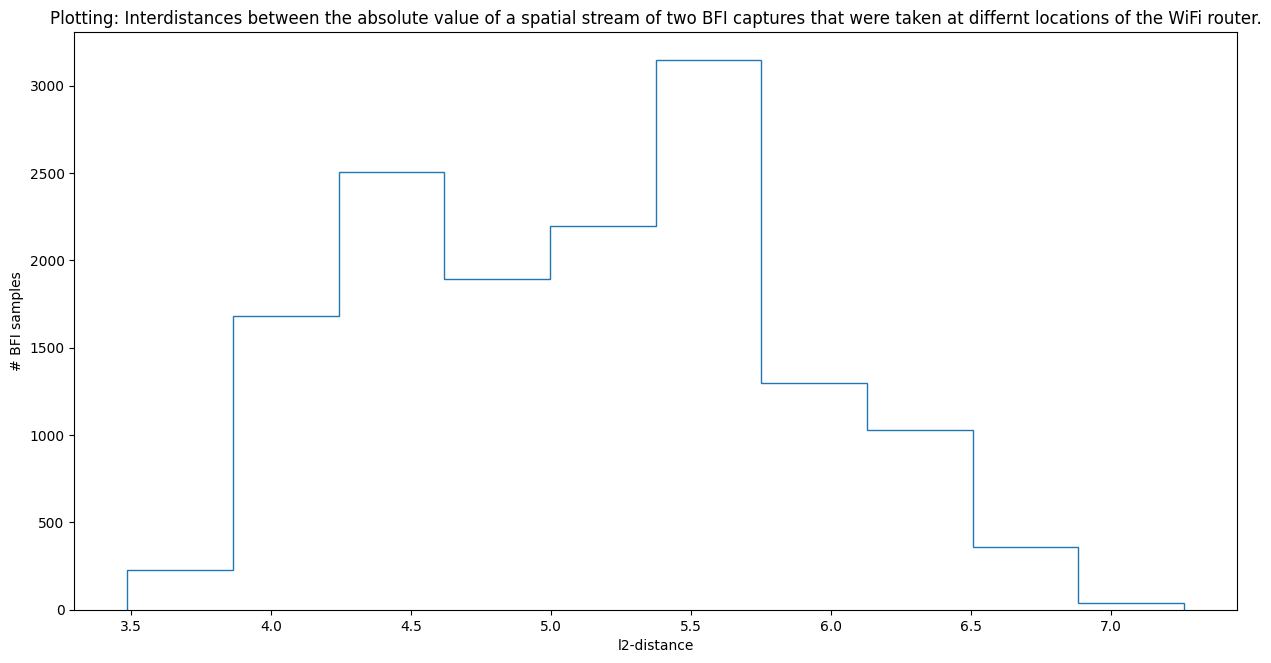

In [23]:
import matplotlib.pyplot as plt
size = (15, 7.5)
xlabel  = "l2-distance"
ylabel  = "# BFI samples"
msg     = "Interdistances between the absolute value of a spatial stream of two BFI captures that were taken at differnt locations of the WiFi router."
plt.rcParams["figure.figsize"] = size
plt.title(f"Plotting: {msg}")
plt.xlabel(xlabel=xlabel)
plt.ylabel(ylabel=ylabel)
counts, bins = np.histogram(dist)
plt.stairs(counts, bins,)

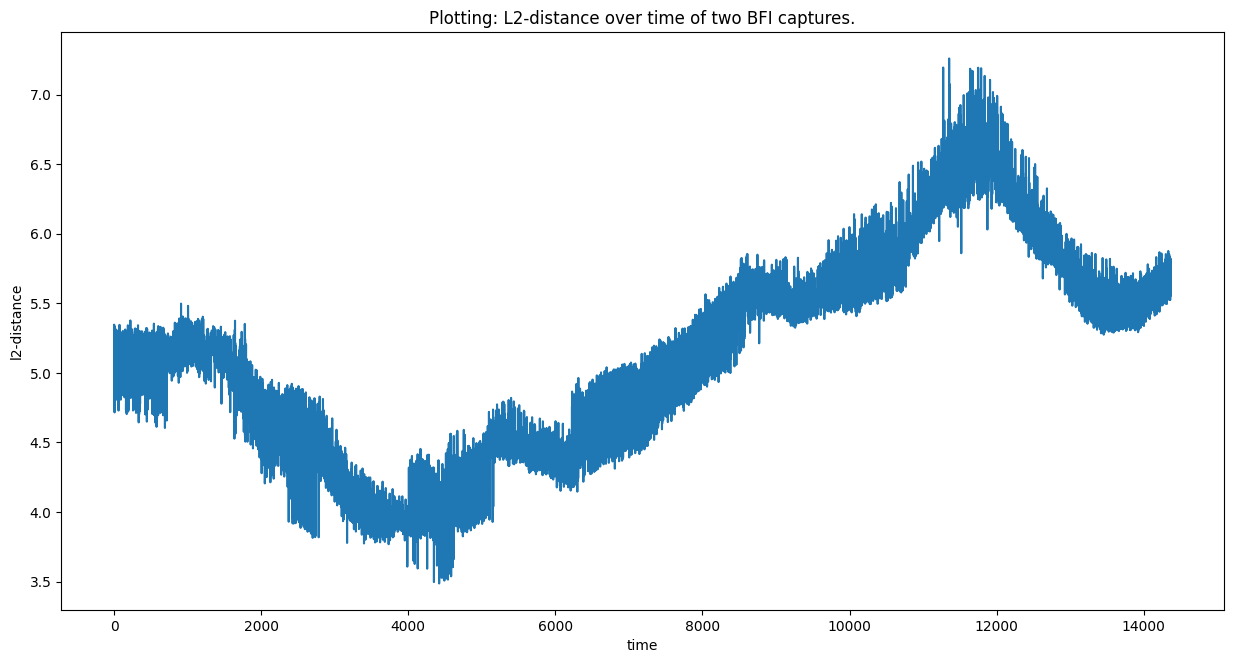

array([5.17051346, 5.34691677, 4.76221362, ..., 5.6006556 , 5.66638232,
       5.66675201])

In [24]:
import wifisidechannels.components.plotter as plotter

plot = plotter.Plotter()

plot.plot_data(
    data=list(dist),
    plot=True,
    size=(15,7.5),
    scatter=False,
    msg="L2-distance over time of two BFI captures.",
    ylabel="l2-distance",
    xlabel="time",
)
